Setup and train a deep neural networks on common benchmark image dataset
-----

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images.

<br>
<center><img src="https://paperswithcode.com/media/datasets/CIFAR-10-0000000431-b71f61c0_U5n3Glr.jpg" width="75%"/></center>

Learn more the dataset [here](https://www.cs.toronto.edu/~kriz/cifar.html) and [here](https://www.kaggle.com/c/cifar-10)     

----
Setup CIFAR data
----



In [106]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10

In [107]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [108]:
# Tests are a great idea to confirm assumptions
# There are 50K images in training and 10K in test
# Each image is 32x32 pixels with 3 channels for RGB values.
assert x_train.shape == (50_000, 32, 32, 3)
assert x_test.shape  == (10_000, 32, 32, 3)
assert y_train.shape == (50_000, 1)
assert y_test.shape  == (10_000, 1)

__Exercise__: Convert class vectors to binary class matrices with kera's `to_categorical` function

In [109]:
### START CODE HERE ###
num_classes = None
y_train = None
y_test = None
### END CODE HERE ###

In [111]:
assert y_train[0][0] == 0
assert y_test[0][0]  == 0

----
Take a look at the data
----

In [112]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

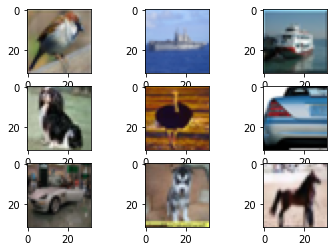

In [113]:
# Create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[randint(0, x_train.shape[0])])

---
Munge data
----

In [114]:
# Normalize inputs from 0-255 to 0.0-1.0
# Data should be normalized in deep learning for improving learning.
# Model weights are initialized between 0 and 1.
# stochastic gradient descent works best when all dimensions are on the same scale.

x_train = x_train.astype('float32')
x_train = x_train / 255.0

x_test = x_test.astype('float32')
x_test = x_test / 255.0

----
Define architecture
-----

In [115]:
from keras.models import Sequential
from keras.layers import * # It is okay to import everything since we are exploring

__Exercise__: Build a Convolutional Neural Network in Keras using a series of `Conv2D` and `Activation` layers.

The model instantiation, first layer, and last layer are given.

Feel free to explore `MaxPooling2D` and `Dropout`.

Feel to add has many layers as you want.

In [116]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

### START CODE HERE ###

model.add = None
model.add = None

### END CODE HERE ###

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [1]:
# Have a look at your model
model.summary()

NameError: name 'model' is not defined

In [119]:
from tensorflow.keras.optimizers import SGD

In [120]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

----
Train model
-----

In [121]:
# Number of samples before a backprop pass of weight updating
batch_size = 32 

In [122]:
# Number of passes over the complete dataset
# This should be 1 to start with to make sure everything is setup correctly and the model is learning
# Increase it until model stops learning
epochs = 1

In [123]:
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size, 
                    epochs=epochs,
                    verbose=True, 
                    validation_data=(x_data[1], y_test))

1563/1563 [==============================] - 273s 174ms/step - loss: 2.0892 - accuracy: 0.2260 - val_loss: 1.9041 - val_accuracy: 0.3277


Test performance
-----

In [124]:
score = model.evaluate(x_test, 
                       y_test, 
                       verbose=True)

313/313 [==============================] - 9s 28ms/step - loss: 1.9041 - accuracy: 0.3277


In [126]:
print(f'Test accuracy: {score[1]:.4f}')

Test accuracy: 0.3277


__Exercise:__

How could you change your model and training to improve performance?

It is a good idea to keep track of your experimental choices in a table


| Training Accuracy | Test Accuracy | Changes |  
|:-------:|:------:|:------:|
|  |  | |
|  |  | | 

Submit your table and your single best model.

<br>
<br> 
<br>

----